In [1]:
import numpy as np
import random
from qiskit import *
from qiskit.visualization import plot_histogram

from qiskit.circuit import Parameter

import random

%matplotlib inline

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [2]:
G=np.array([[1,0,0,0,1,0,1,0,1],
            [0,1,0,0,1,0,0,1,1],
            [0,0,1,0,0,1,1,0,1],
            [0,0,0,1,0,1,0,1,1]])
m = [1,1,1,1]
c=[]
for i in range(9):
    x = 0
    for j in range(4):
        s = m[j]*G[j][i]
        x = x+s
    x = x%2
    c.append(x)
    
print(c)



[1, 1, 1, 1, 0, 0, 0, 0, 0]


In [3]:
def reverse(string):
    str = ""
    for i in string:
        str = i + str
    return str

In [4]:
def mixer(beta,num_qubit):
    codeword = QuantumRegister(num_qubit,'codeword')
    
    recieved = QuantumRegister(num_qubit,'recieved')
    circ = QuantumCircuit(codeword,recieved)
    
    circ.h(3)
    circ.h(5)
    circ.h(7)
    circ.h(8)
    
    circ.cx(3,5)
    circ.cx(5,7)
    circ.cx(7,8)
    circ.rz(-2*beta,8)
    circ.cx(7,8)
    circ.cx(5,7)
    circ.cx(3,5)
    
    circ.h(3)
    circ.h(5)
    circ.h(7)
    circ.h(8)
    
    circ.barrier()
    
    circ.h(2)
    circ.h(5)
    circ.h(6)
    circ.h(8)
    
    circ.cx(2,5)
    circ.cx(5,6)
    circ.cx(6,8)
    circ.rz(-2*beta,8)
    circ.cx(6,8)
    circ.cx(5,6)
    circ.cx(2,5)
    
    circ.h(2)
    circ.h(5)
    circ.h(6)
    circ.h(8)
    circ.barrier()
    
    circ.h(1)
    circ.h(4)
    circ.h(7)
    circ.h(8)
    
    circ.cx(1,4)
    circ.cx(4,7)
    circ.cx(7,8)
    circ.rz(-2*beta,8)
    circ.cx(7,8)
    circ.cx(4,7)
    circ.cx(1,4)
    
    circ.h(1)
    circ.h(4)
    circ.h(7)
    circ.h(8)
    circ.barrier()
    
    circ.h(0)
    circ.h(4)
    circ.h(6)
    circ.h(8)
    
    circ.cx(0,4)
    circ.cx(4,6)
    circ.cx(6,8)
    circ.rz(-2*beta,8)
    circ.cx(6,8)
    circ.cx(4,6)
    circ.cx(0,4)
    
    circ.h(0)
    circ.h(4)
    circ.h(6)
    circ.h(8)
    circ.barrier()
    
    circ.h(2)
    circ.h(3)
    circ.h(6)
    circ.h(7)
    
    circ.cx(2,3)
    circ.cx(3,6)
    circ.cx(6,7)
    circ.rz(-2*beta,7)
    circ.cx(6,7)
    circ.cx(3,6)
    circ.cx(2,3)
    
    circ.h(2)
    circ.h(3)
    circ.h(6)
    circ.h(7)
    circ.barrier()
    
    circ.h(1)
    circ.h(3)
    circ.h(4)
    circ.h(5)
    
    circ.cx(1,3)
    circ.cx(3,4)
    circ.cx(4,5)
    circ.rz(-2*beta,5)
    circ.cx(4,5)
    circ.cx(3,4)
    circ.cx(1,3)
    
    circ.h(1)
    circ.h(3)
    circ.h(4)
    circ.h(5)
    circ.barrier()
    
    circ.h(0)
    circ.h(2)
    circ.h(4)
    circ.h(5)
    
    circ.cx(0,2)
    circ.cx(2,4)
    circ.cx(4,5)
    circ.rz(-2*beta,5)
    circ.cx(4,5)
    circ.cx(2,4)
    circ.cx(0,2)
    
    circ.h(0)
    circ.h(2)
    circ.h(4)
    circ.h(5)
    circ.barrier()
    
    circ.h(0)
    circ.h(1)
    circ.h(6)
    circ.h(7)
    
    circ.cx(0,1)
    circ.cx(1,6)
    circ.cx(6,7)
    circ.rz(-2*beta,7)
    circ.cx(6,7)
    circ.cx(1,6)
    circ.cx(0,1)
    
    circ.h(0)
    circ.h(1)
    circ.h(6)
    circ.h(7)
    circ.barrier()
    
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.h(3)
    
    circ.cx(0,1)
    circ.cx(1,2)
    circ.cx(2,3)
    circ.rz(-2*beta,3)
    circ.cx(2,3)
    circ.cx(1,2)
    circ.cx(0,1)
    
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.h(3)
    circ.barrier()
    return circ

In [5]:
def cost_unitary(gamma,num_qubit):
    codeword = QuantumRegister(num_qubit,'codeword')
    recieved = QuantumRegister(num_qubit,'recieved')
    circ = QuantumCircuit(codeword,recieved)
    for i in range(num_qubit):
        circ.cx(codeword[i],recieved[i])
        circ.rz((-gamma),recieved[i])
        circ.cx(codeword[i],recieved[i])
        circ.barrier()
    
    return circ

In [6]:

gamma = Parameter("$\\gamma$") #np.pi/2

beta = Parameter("$\\beta$") #np.pi/3

################ theta is the initial parameters [beta,gamma] :

def create_qaoa_circ(theta,num_qubit,p,r):   # beta and gamma are lists here
    
#     beta1 = theta[0]
#     gamma1 = theta[1]
    
#     beta =[]
#     gamma = []
    beta = theta[0]
    gamma = theta[1]
    
#     if p > 1:
#         j = 0
#         while j < ((2*p)-2): #for i in range(len(theta)-1,2):
#             beta.append(optm_param[j])
#             gamma.append(optm_param[j+1])
#             j = j+2

#     beta.append(beta1)
#     gamma.append(gamma1)
    
    
    codeword = QuantumRegister(num_qubit,'codeword')
    recieved = QuantumRegister(num_qubit,'recieved')
    cbit = ClassicalRegister(num_qubit)
    circ = QuantumCircuit(codeword,recieved,cbit)

    for i in range(len(r)):
        if r[i] == '1':
            circ.x(recieved[i])
    
    circ.h(range(4))
    
    circ.cx(0,4)
    circ.cx(0,6)
    circ.cx(0,8)
    
    circ.cx(1,4)
    circ.cx(1,7)
    circ.cx(1,8)
    
    circ.cx(2,5)
    circ.cx(2,6)
    circ.cx(2,8)
    
    circ.cx(3,5)
    circ.cx(3,7)
    circ.cx(3,8)
    
    circ.barrier()
    
    for i in range(p):
        
        # The time evolution unitary of cost hamiltonian:
        
        circ.append(mixer(beta,num_qubit),range(2*num_qubit))
        circ.append(cost_unitary(gamma,num_qubit),range(2*num_qubit))
    circ.measure(range(num_qubit),range(num_qubit))
    
    #circ.measure_all()

    
    return circ

In [7]:
# define a function which calculate the function value for a measurement
def hamming_weight(x,r):
    
    weight = 0
    for i in range(len(r)):
        if x[i]!=r[i]:
            weight = weight + 1
    return weight

#print(hamming_weight('0110','1110'))

# define a function for calculating the average
def compute_expectation(counts,r):
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        obj = hamming_weight(reverse(bitstring),r)          # r should be given
        avg = avg + (obj*count)
        sum_count = sum_count + count
    
    expectn = avg/sum_count
        
    return expectn

def get_expectation(r,p):
    simulator = Aer.get_backend('qasm_simulator')
    shots = 1000
    num_qubit = 9
    def execute_circ(theta):
        circ = create_qaoa_circ(theta,num_qubit,p,r)
        job = execute(circ, backend=simulator, shots=2000)
        counts = job.result().get_counts()
        
        return compute_expectation(counts, r)
    
    return execute_circ

In [8]:
# from scipy.optimize import minimize

# def mini():
#     data = []
#     ratio_data = []
#     y_data = []
#     mean = 0.0
#     no = 11
#     p = 2
#     for xxx in range(no):
#         r = '111011011'
#         f_max = 1.0
#         optm_param = []
#         #data = []
#         param_beta = []
#         param_gamma = []

#         #for pp in range(p):
#         func = []
#         approx_ratio = []
#         param_1 = []
#         param_2 = []
#         for repeatation in range(5):
#             expectation = get_expectation(p,r)

#             res = minimize(expectation, 
#                                   [random.uniform(0,20.0),random.uniform(0,50*np.pi)],             # [1.0,np.pi]
#                                   method='COBYLA')                                              
#             func.append(res.fun)
#             param_1.append(res.x[0])
#             param_2.append(res.x[1])
#         for i in range(len(func)):
#             approx_ratio.append(func[i]/f_max)
#         min_approx_ratio = min(approx_ratio)
#         for i in range(len(func)):
#             mean = mean + approx_ratio[i]
            
#         mean = mean/len(func)
#         ratio_data.append(mean)
#         for i in range(len(func)):
#             if approx_ratio[i] == min_approx_ratio:
#                 param_beta.append(param_1[i])
#                 param_gamma.append(param_2[i])

#         print(str(xxx+1)+'st simulation is done!')

#         p = p+1
#     return ratio_data
           

In [9]:
from scipy.optimize import minimize

r = '111011011'
p = 3
f_max = 1.0
optm_param = []
data = []
param_beta = []
param_gamma = []

for pp in range (p):
    func = []          # function value
    param_1 = []
    param_2 = []
    approx_ratio = []
    for repeatation in range(5):

        expectation = get_expectation(r,p)
        
        res = minimize(expectation, 
                       [random.uniform(0,20.0),random.uniform(0,50*np.pi)],method = 'COBYLA')
        
        func.append(res.fun)
        param_1.append(res.x[0])
        param_2.append(res.x[1])
    for i in range(len(func)):
        approx_ratio.append(func[i]/f_max)
    min_approx_ratio = min(approx_ratio)
    
    for i in range(len(func)):
        if approx_ratio[i] == min_approx_ratio:
            param_beta.append(param_1[i])
            param_gamma.append(param_2[i])
    
    data.append(min_approx_ratio)
    print('At each p = '+str(pp+1)+' the minimum approximation ratio is :',min_approx_ratio)

At each p = 1 the minimum approximation ratio is : 2.155
At each p = 2 the minimum approximation ratio is : 2.199
At each p = 3 the minimum approximation ratio is : 2.121


In [10]:
# result = mini()
# print(result)

In [11]:
# import matplotlib.pyplot as plt
# x = []
# no = 10
# p = [2,3,4,5,6,7,8,9,10,11,12]
# # for i in range(no):
# #     x.append(i+1)
# #plt.bar(x,result,color='blue')
# plt.plot(p,result,'-o',color = 'blue')
# # plt.title('Distribution of approximation target state |011011>')
# plt.title('Performance with depth')
# # plt.xlabel('Simulation Instances')
# plt.xlabel('p')
# # plt.ylabel('No. of occurences')
# plt.ylabel('mean approximation ratio')
# plt.grid()
# plt.show()

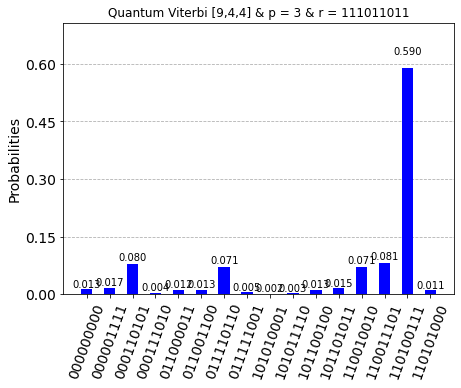

In [86]:
num_qubit = 9
p = 3
ip = [param_beta[p-1],param_gamma[p-1]]
optm_circ = create_qaoa_circ(ip,num_qubit,p,r)

simulator = Aer.get_backend('qasm_simulator')
job = execute(optm_circ, backend=simulator, shots=2000)
counts = job.result().get_counts()
plot_histogram(counts,color='blue',title='Quantum Viterbi [9,4,4] & p = '+str(p)+' & r = '+str(r))                                                                                                      

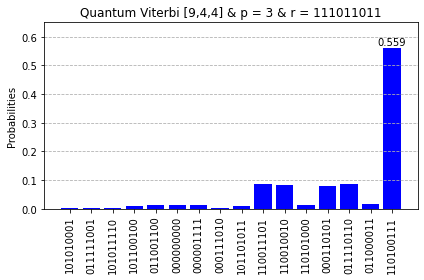

In [85]:
import matplotlib.pyplot as plt

data_x = list(counts.keys())
data_x.reverse()
data_y = list(counts.values())
data_y.reverse()
y = []

for i in range(len(data_y)):
    y.append(data_y[i]/2000)

label = []

plt.text(14.3,0.57,y[len(data_y)-1])
    
plt.bar(data_x,y,color = 'blue')
plt.ylim(0,0.65)
plt.title('Quantum Viterbi [9,4,4] & p = '+str(p)+' & r = '+str(r))
plt.ylabel('Probabilities')
plt.xticks(data_x,data_x,rotation = 'vertical')
plt.grid(linestyle = '--',axis='y')
plt.tight_layout()
plt.savefig('944upo2_600.png',dpi=600)

In [13]:
# for s in counts:
#     print(s)

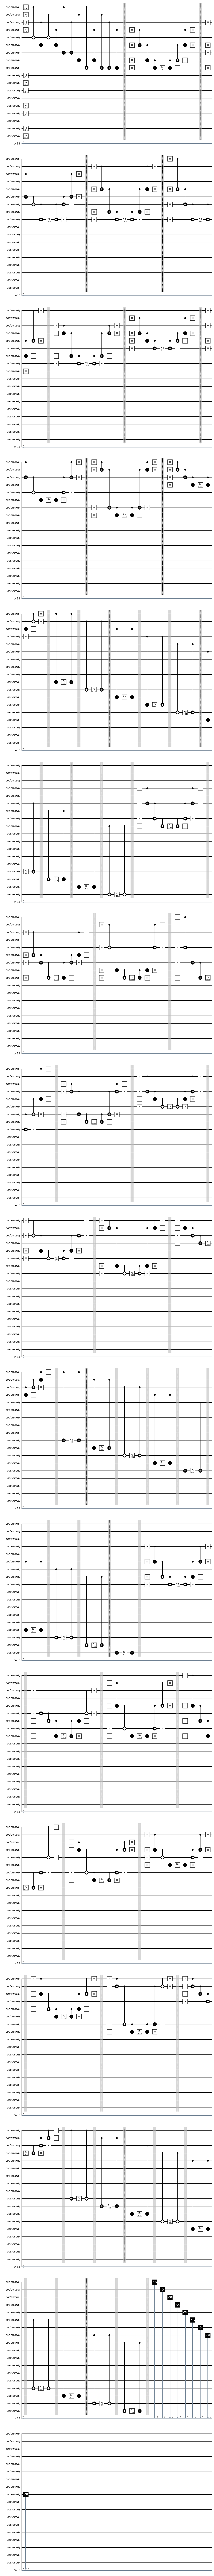

In [14]:
optm_circ.decompose().draw('mpl',style = 'bw')